# Regression and Other Stories: Elections Economy

*Note*: This code in this notebook follows the book order of presentation

In [9]:
import arviz as az
from bambi import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

*Insert Graphing the Bread and Peace Model*

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
hibbs = pd.read_csv(data, delimiter=" ")
hibbs

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


### Graphing the bread and peace model

In [ ]:
# TODO

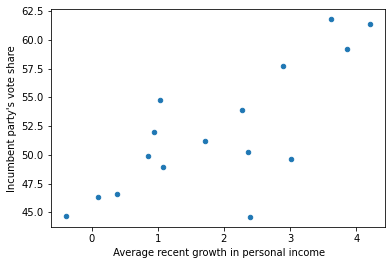

In [3]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

### Linear regression

In [11]:
model = Model(hibbs)
M1 = model.fit('vote ~ growth', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vote_sd, growth, Intercept]
INFO:pymc3:NUTS: [vote_sd, growth, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [12]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M1, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],47.13,1.15
growth[0],2.64,0.48
vote_sd,3.97,0.51


In [ ]:
# TODO Add prior_summary()

In [ ]:
# TODO Add more details summary()

### Posterior interval
In Bambi and ArviZ the summary method gives us the posterior interval as well as many of the diagnostics

In [13]:
az.summary(M1, round_to=1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept[0],47.2,1.7,43.9,50.6,0.1,0.0,1038.5,1034.5,1046.1,1412.2,1.0
growth[0],2.6,0.7,1.3,4.0,0.0,0.0,1110.8,1110.8,1125.3,1641.3,1.0
vote_sd,4.0,0.7,2.8,5.3,0.0,0.0,1213.6,1097.3,1209.0,771.8,1.0


### Bonus: Show ordinary least squares regression

In [10]:
results = smf.ols('vote ~ growth', data=hibbs).fit()
results.summary()

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   vote   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           0.000610
Time:                        03:03:25   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2476      1.622     28.514      0.000      42.769      49.726
growth         3.0605      0.696      4.396      0.001       1.567       4.554
==============================================================================
Omnibus:                        5.392   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.828
Skew:                          -0.961   Prob(JB):                        0.243
Kurtosis:                       3.738   Cond. No.                         4.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Regression Line


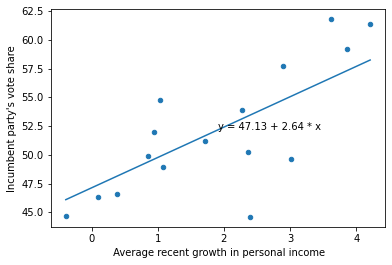

In [22]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["growth[0]", "Median"]

# Generate x range
growth_domain = np.linspace(hibbs["growth"].min(), hibbs["growth"].max(), 100)

# Plot Line
ax.plot(growth_domain, a_hat+b_hat*growth_domain)

# Add formula
growth_midpoint = growth_domain.mean()
ax.text(growth_midpoint, a_hat+b_hat*growth_midpoint,
       f"y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x");


# Add scatter plot
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

### Plot prediction given 2% growth

In [ ]:
# TODO

## Illustrate computations

In [36]:
# In Bambi the results are returned as InferenceData objects
# which are already in an easily selectable format
M1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [46]:
a = M1.posterior["Intercept"].values.flatten()
b = M1.posterior["growth"].values.flatten()
sigma = M1.posterior["vote_sd"].values.flatten()

# Since bambi can run multiple chains and draws the number of simulations
# is chains* draws
n_sims = M1.posterior.coords["chain"].shape[0] * M1.posterior.coords["draw"].shape[0]

4000

### Median 

In [47]:
M1.posterior.median()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    Intercept  float64 47.13
    growth     float64 2.639
    vote_sd    float64 3.965

### Mean Absolute Deviation (MAD_SD) 
TODO: Right now is standard deviation. Need to change it to MAD

In [48]:
M1.posterior.std()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    Intercept  float64 1.748
    growth     float64 0.724
    vote_sd    float64 0.6938

In [39]:

a = M1.posterior["Intercept"].values.flatten()
b = M1.posterior["growth"].values.flatten()
z = a/b
np.median(z)

17.866136753544463

In [49]:
stats.median_abs_deviation(z)

3.4909667505732216

### Point prediction given 2% growth

TODO: Verify this is true
Bambi does not have a way to make predictions given a data frame of independent variables

### Alternative way to compute the point prediction

In [51]:
new = 2.0
a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["growth[0]", "Median"]
y_point_pred = a_hat + b_hat*new
y_point_pred

52.410000000000004

### Uncertainty in prediction given 2% growth

TODO: Verify this is true
Bambi does not have a way to make predictions given a data frame of independent variables

### Do same computation “manually”

In [54]:
a = M1.posterior["Intercept"].values.flatten()
b = M1.posterior["growth"].values.flatten()
y_linpred = a + b*new
y_linpred

array([52.51737382, 51.40721956, 53.12638398, ..., 52.12015784,
       51.04599172, 52.32857236])

### Predictive uncertainty
With a PyMC3 backend we can use the posterior predictive method to do this

TODO: Verify this is true
Bambi does not have a way to make posterior predictive given a data frame of independent variables


### Predictive uncertainty manually

In [62]:
sigma = M1.posterior["vote_sd"].values.flatten()
n_sims = sigma.shape
y_pred = a+b*new + stats.norm(0, sigma).rvs(n_sims)

#### Summarize Predictions

In [69]:
Median = np.median(y_pred)
MAD_SD = stats.median_abs_deviation(y_pred)
win_prob = (y_pred > 50).mean()
median, MAD_SD, win_prob

(f"Predicted Clinton percentage of 2-party vote: {np.round(Median,1)}"
f" with s.e. {np.round(MAD_SD, 1)}"
f"\nPr (Clinton win) = {np.round(win_prob, 2)}")

'Predicted Clinton percentage of 2-party vote: 52.5 with s.e. 2.7\nPr (Clinton win) = 0.72'

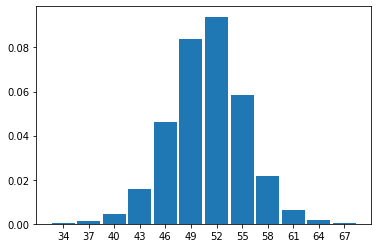

In [71]:
az.plot_dist(y_pred, kind="hist");

### Predict for many new values

In [ ]:
# TODO: Figure out if there's a simple way in bambi to set pymc3 style
# Shared value to allow for input vars to be changed afterwards

### Plots

Text(0, 0.5, 'b')

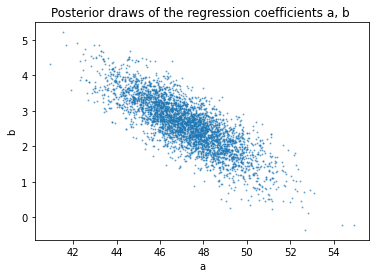

In [77]:
fig, ax = plt.subplots()

ax.scatter(a, b, s=1, alpha=.5)
ax.set_title("Posterior draws of the regression coefficients a, b ")
ax.set_xlabel("a")
ax.set_ylabel("b");

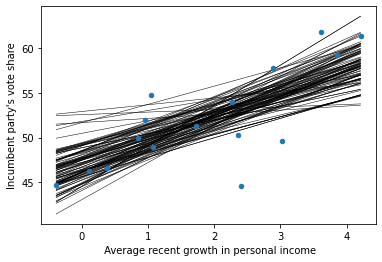

In [86]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["growth[0]", "Median"]

# Generate x range
growth_domain = np.linspace(hibbs["growth"].min(), hibbs["growth"].max(), 100)


# Plot Line
for i in range(100):
    a_i, b_i = a[i], b[i]
    ax.plot(growth_domain, a_i+b_i*growth_domain, c="black",
            linewidth=.5,
            zorder=1)

# Add scatter plot
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax, zorder=2)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

### Add more uncertainty

In [91]:
x = stats.norm(2.0, 0.3).rvs(n_sims)
sigma = M1.posterior["vote_sd"].values.flatten()
n_sims = sigma.shape
y_pred = a+b*new + stats.norm(0, sigma).rvs(n_sims)

Median = np.median(y_pred)
MAD_SD = stats.median_abs_deviation(y_pred)
win_prob = (y_pred > 50).mean()
median, MAD_SD, win_prob

(f"Predicted Clinton percentage of 2-party vote: {np.round(Median,1)}"
f" with s.e. {np.round(MAD_SD, 1)}"
f" Pr (Clinton win) = {np.round(win_prob, 2)}")

'Predicted Clinton percentage of 2-party vote: 52.5 with s.e. 2.8 Pr (Clinton win) = 0.72'

Text(0.5, 1.0, 'Bayesian simulations of Hillary Clinton vote share, \nbased on 2% rate of economic growth')

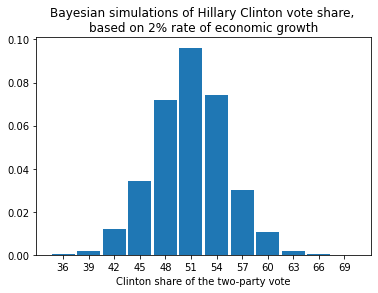

In [92]:
ax = az.plot_dist(y_pred, kind="hist")
ax.set_xlabel("Clinton share of the two-party vote")
ax.set_ylabel("")
ax.set_title("Bayesian simulations of Hillary Clinton vote share, \nbased on 2% rate of economic growth");

### Bayesian inference and prior information

Combining information from a forecast and a poll. Hypothetical forecast and data.

In [96]:
theta_hat_prior = 0.524
se_prior = 0.041

n = 400
y = 190
theta_hat_data = y/n
se_data = np.sqrt((y/n)*(1-y/n)/n)

theta_hat_bayes = (theta_hat_prior / se_prior**2 + theta_hat_data / se_data**2) / (1 / se_prior**2 + 1 / se_data**2)

se_bayes = np.sqrt(1/(1/se_prior**2 + 1/se_data**2))

In [97]:
se_data = .075
print((theta_hat_prior/se_prior**2 + theta_hat_data/se_data**2)/(1/se_prior**2 + 1/se_data**2))

0.5127258417738846
